# Decision Tree Regressor
# ****************************

### Variance Reduction
### **********************
#### In regression we use variance reduction insted of gini index and information gain
#### formula, 
#### $Var Red=Var(parent)-\sum w_i Var(child_i)$

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [5]:
diabetes =datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [6]:
diabetes.DESCR# to know the discription of the datasets in sklearn

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [9]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


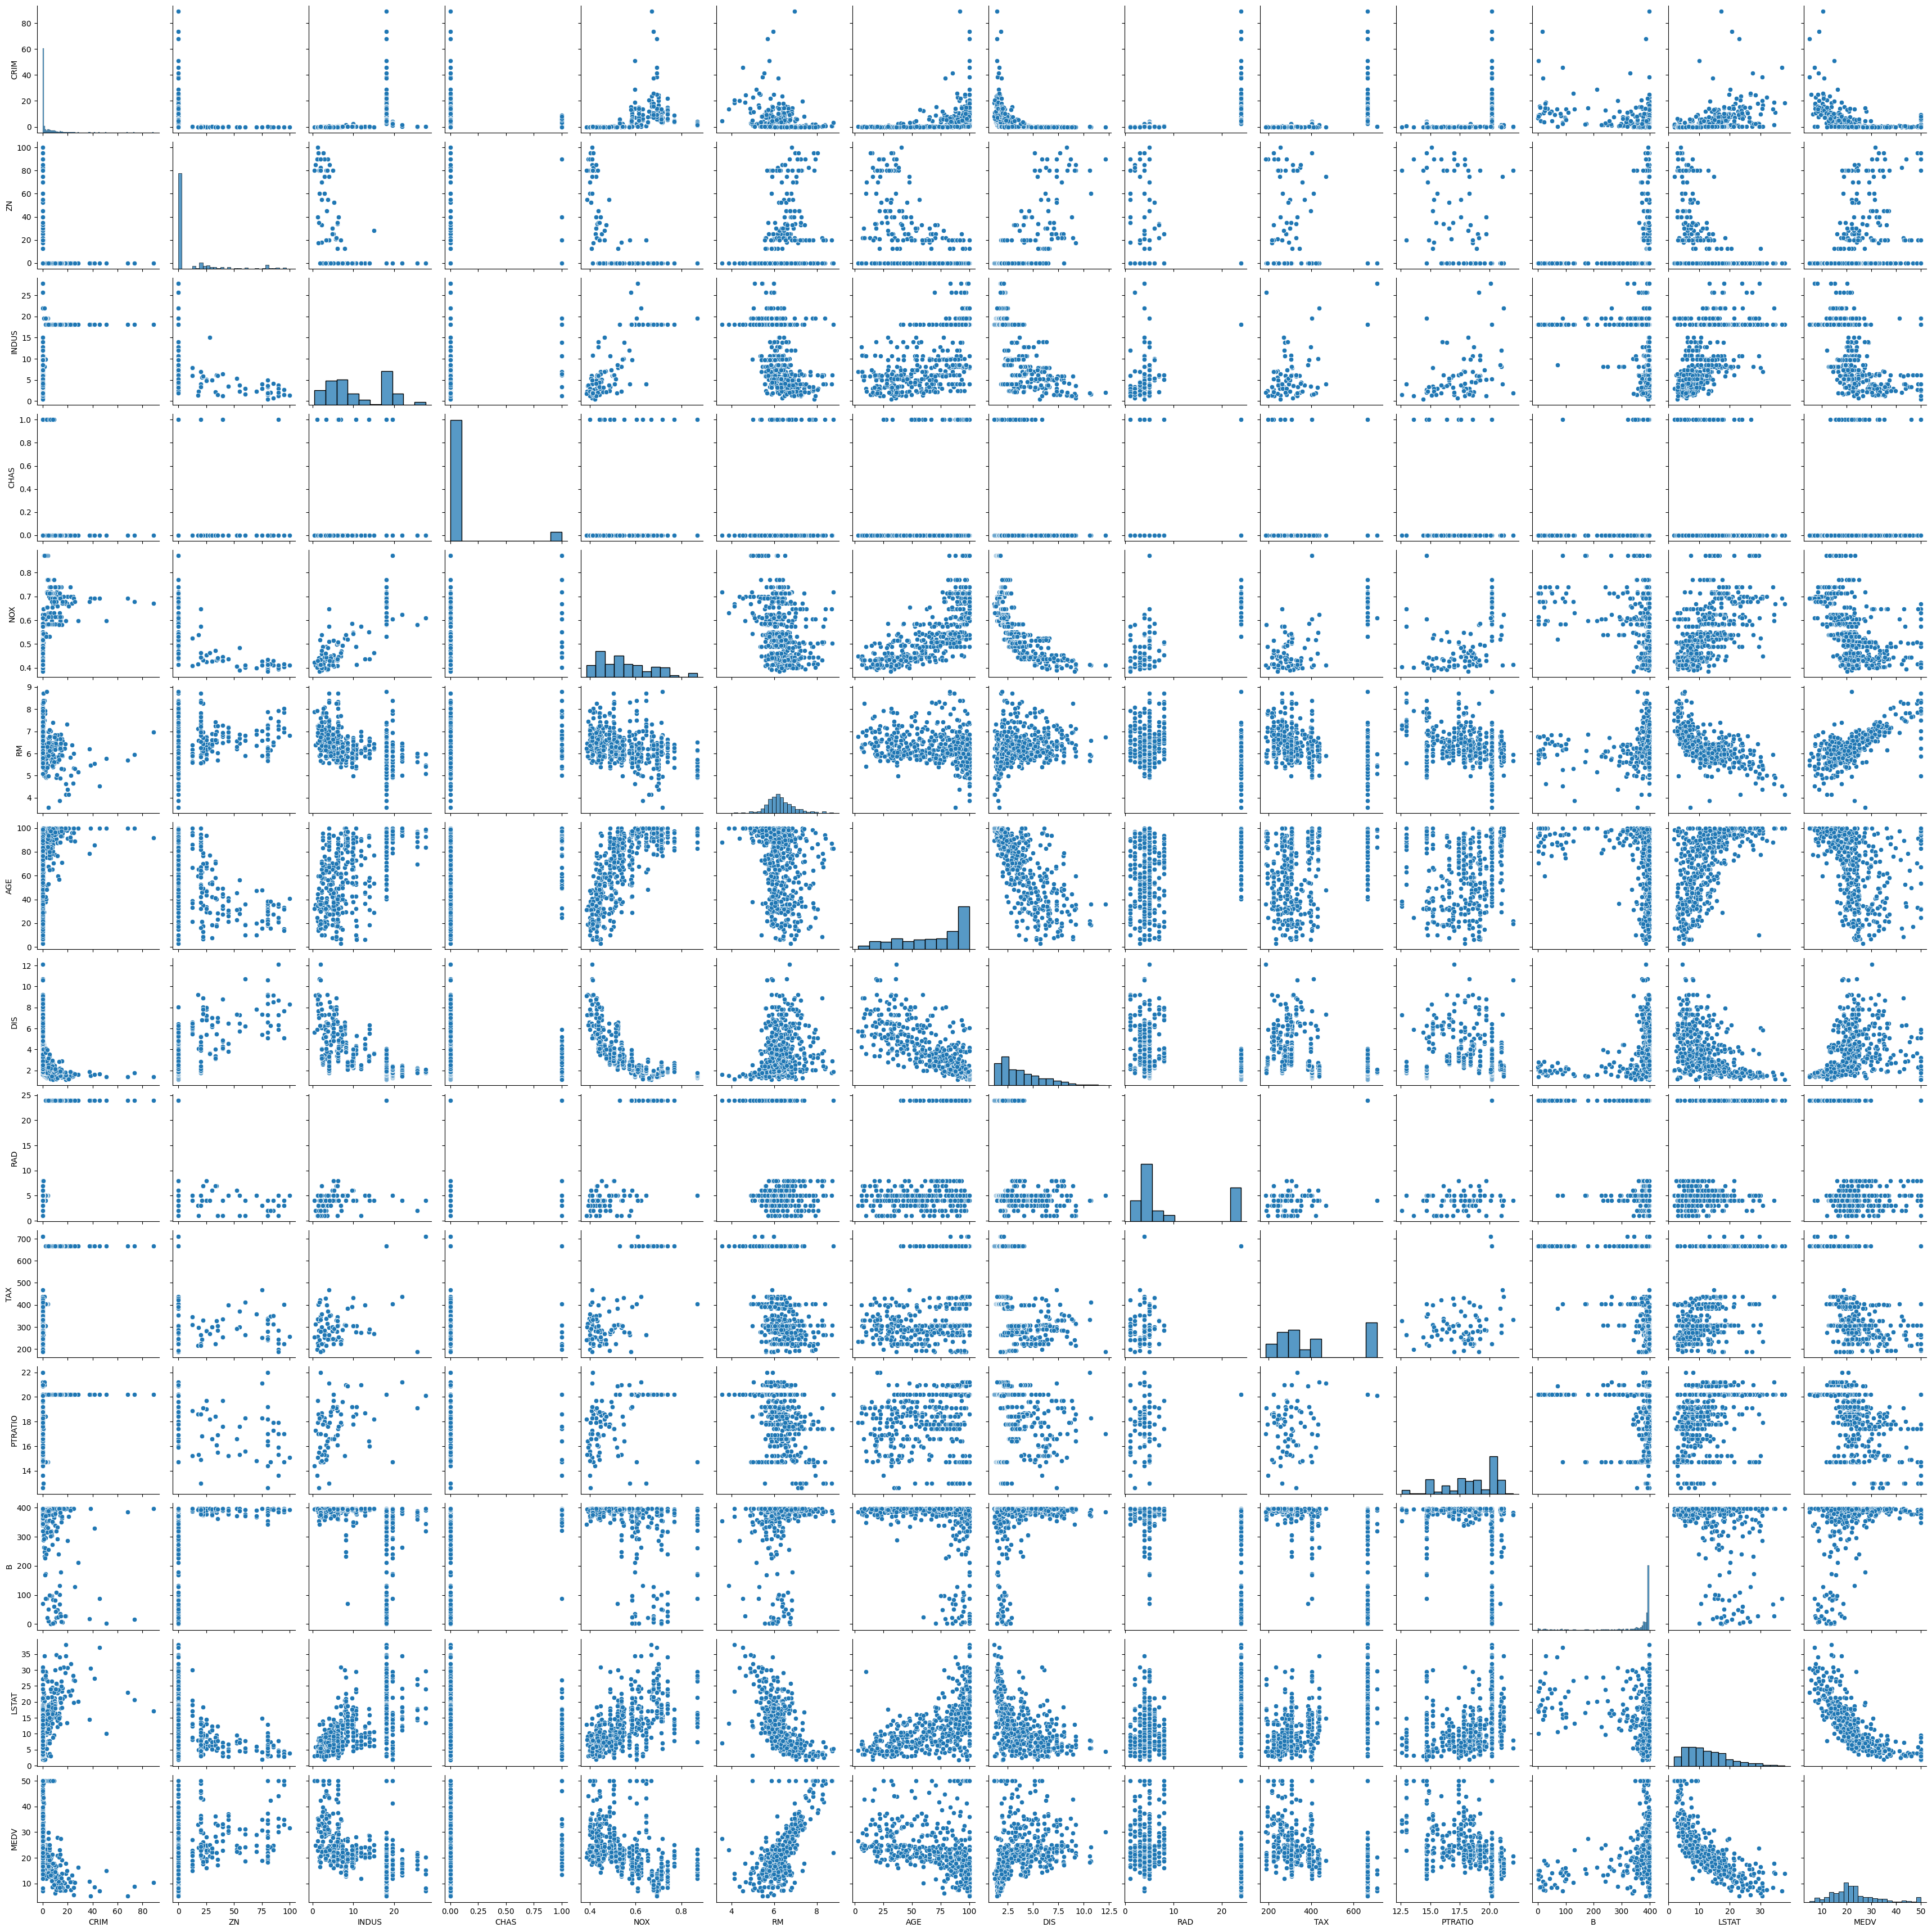

In [30]:
sns.pairplot(boston)

In [11]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [14]:
X=boston.drop('MEDV',axis=1)
y=boston['MEDV']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree1=DecisionTreeRegressor()

In [39]:

tree1.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
linear.fit(X_train,y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [25]:
pred1=linear.predict(X_test)
pred2=tree.predict(X_test)

In [26]:
mean_absolute_error(pred1,y_test)

3.1627098714573947

In [27]:
mean_absolute_error(pred2,y_test)

2.3888157894736843

In [28]:
mean_squared_error(pred1,y_test)

21.51744423117709

In [29]:
mean_squared_error(pred2,y_test)

10.441250000000002

In [31]:
r2_score(pred1,y_test)

0.6693702691495622

In [32]:
r2_score(pred2,y_test)

0.8635890895876394

[Text(0.6797997137034162, 0.9761904761904762, 'x[5] <= 6.941\nsquared_error = 87.897\nsamples = 354\nvalue = 23.016'),
 Text(0.4149177503881988, 0.9285714285714286, 'x[12] <= 14.4\nsquared_error = 41.295\nsamples = 292\nvalue = 20.084'),
 Text(0.20086724680814355, 0.8809523809523809, 'x[7] <= 1.385\nsquared_error = 26.114\nsamples = 178\nvalue = 23.47'),
 Text(0.13249978433402346, 0.8333333333333334, 'x[11] <= 339.985\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.12973925983436854, 0.7857142857142857, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.1352603088336784, 0.7857142857142857, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.2692347092822636, 0.8333333333333334, 'x[5] <= 6.543\nsquared_error = 14.233\nsamples = 174\nvalue = 22.987'),
 Text(0.14078135783298826, 0.7857142857142857, 'x[12] <= 7.76\nsquared_error = 7.174\nsamples = 133\nvalue = 21.639'),
 Text(0.028295376121463076, 0.7380952380952381, 'x[0] <= 0.032\nsquared_error = 2.279\nsa

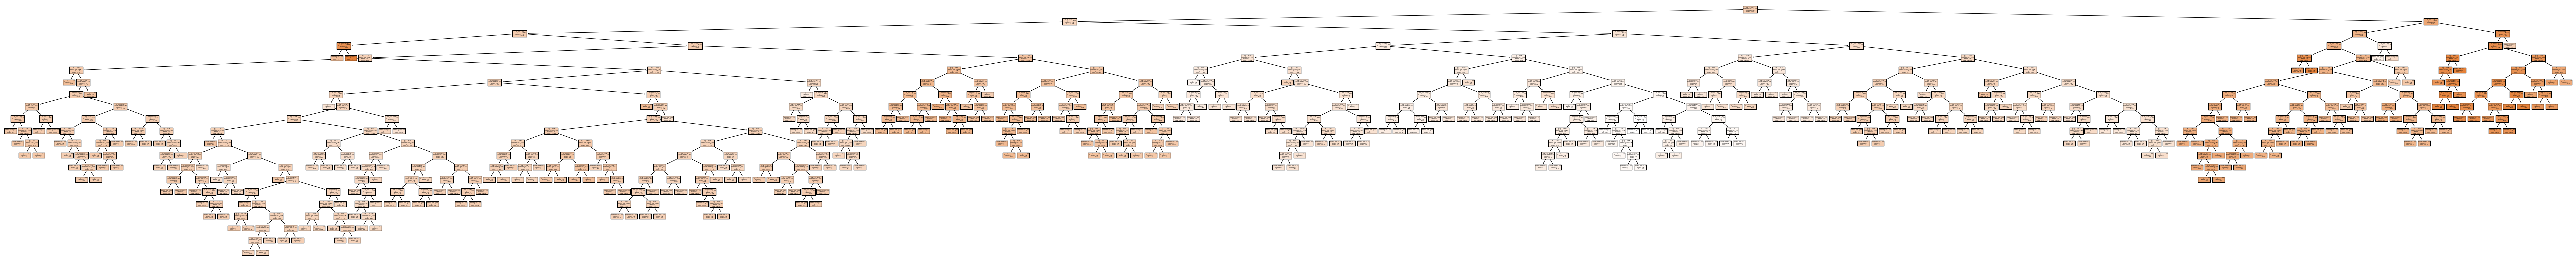

In [42]:
plt.figure(figsize=(100,10))
tree.plot_tree(tree1,filled=True)